### Tecnologie dei dati e del linguaggio
# Dati e informazione
## Prof. Alfio Ferrara

## Informazione e incertezza
L'informazione è qualcosa che cambia il nostro sapere sul mondo e un modo per misurare questo effetto è osservare quanto un **dato**, ovvero un elemento di potenziale conoscenza, un'osservazione sulla realtà, possa ridurre il nostro grado di incertezza circa un evento, un fenomeno e più in generale sulla realtà che osserviamo.

### Esempio: indovina la città
Le città possibili sono: "New York", "Tokyo", "Parigi", "Londra", "Sydney", "Milano", "Città del Capo", "Mosca", "Roma", "Pechino"

Senza sapere nulla né fare domande, qual è la probabilità di indovinare?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

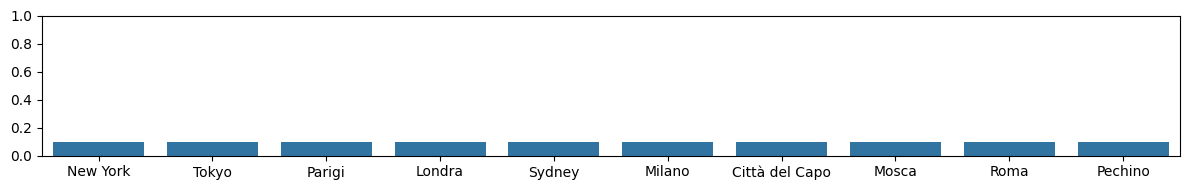

In [3]:
citta = ["New York", "Tokyo", "Parigi", "Londra", "Sydney", "Milano", "Città del Capo", "Mosca", "Roma", "Pechino"]
p = np.array([1 / len(citta) for x in citta])

fig, ax = plt.subplots(figsize=(12, 2))
sns.barplot(x=citta, y=p, ax=ax)
ax.set_ylim((0, 1))
plt.tight_layout()
plt.show()

Quanta incertezza abbiamo? Un modo per misurarlo è usare l'**entropia** come misura della quantità di informazione contenuta in un messaggio. Al momento non abbiamo alcun messaggio circa la città giusta, perciò ci troviamo in una situazione la cui incertezza può essere misurata osservando la distribuzione di probabilità circa gli esiti possibili, con questa formula (**entropia**):

$$
H = - \sum\limits_{i=0}^{n} p_i \log_2 p_i
$$

In [4]:
def entropia(probs):
    return -sum(p * np.log2(p) for p in probs if p > 0)

print(f"Nessun messaggio: {np.round(entropia(p), 2)} bit")

Nessun messaggio: 3.32 bit


### L'effetto dei dati
Immaginiamo di fare ora una domanda e grazie a essa scoprire che la città da indovinare è in Europa. Come cambia ciò che sappiamo?

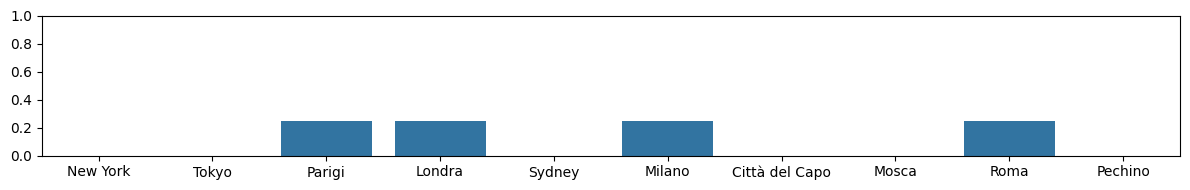

In [5]:
citta_eu = ['Parigi', 'Londra', 'Milano', 'Roma']
p_eu = np.array([1 / len(citta_eu) if c in citta_eu else 0 for c in citta])

fig, ax = plt.subplots(figsize=(12, 2))
sns.barplot(x=citta, y=p_eu, ax=ax)
ax.set_ylim((0, 1))
plt.tight_layout()
plt.show()

In [6]:
entropia_none = entropia(p)
entropia_eu = entropia(p_eu)
print(f"Nessun messaggio: {np.round(entropia_none, 2)} bit")
print(f"Città EU: {np.round(entropia_eu, 2)} bit")
print(f"Riduzione di incertezza: {np.round(entropia_none - entropia_eu, 2)} bit")

Nessun messaggio: 3.32 bit
Città EU: 2.0 bit
Riduzione di incertezza: 1.32 bit


Ora, immaginiamo invece di scoprire con una domanda che la città è in Italia

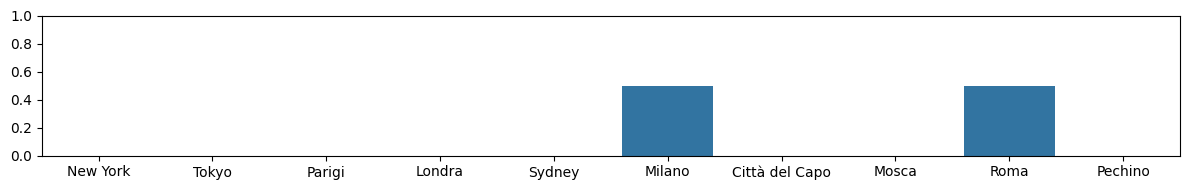

In [7]:
citta_it = ['Milano', 'Roma']
p_it = np.array([1 / len(citta_it) if c in citta_it else 0 for c in citta])

fig, ax = plt.subplots(figsize=(12, 2))
sns.barplot(x=citta, y=p_it, ax=ax)
ax.set_ylim((0, 1))
plt.tight_layout()
plt.show()

In [8]:
entropia_none = entropia(p)
entropia_it = entropia(p_it)
print(f"Nessun messaggio: {np.round(entropia_none, 2)} bit")
print(f"Città IT: {np.round(entropia_it, 2)} bit")
print(f"Riduzione di incertezza: {np.round(entropia_none - entropia_it, 2)} bit")

Nessun messaggio: 3.32 bit
Città IT: 1.0 bit
Riduzione di incertezza: 2.32 bit


#### Quale dei due dati è stato più informativo?

Si noti che se dovessimo scegliere quale domanda fare la questione sarebbe diversa, perchè dobbiamo anche considerare il caso in cui la risposta sia "no" e pertanto non si riduca affatto la nostra incertezza, anzi, al contrario se la città non fosse italiana e l'incertezza sarebbe maggiore rispetto al caso in cui la città non è europea.

Dunque non fare alcuna domanda ha valore:

In [9]:
print(f"Nessuna domanda: {np.round(-1/10 * np.log2(1/10), 2)}")

Nessuna domanda: 0.33


Ma chiedere: *"E' una città italiana?"* significa avere $\frac{1}{2}$ di probabilità nel caso di risposta affermativa, ma $\frac{1}{8}$ nel caso di risposta negativa. Se invece chiediamo *"E' una città europea?"*, abbiamo $\frac{1}{4}$ in caso affermativo e $\frac{1}{6}$ in caso negativo. Pertanto:

In [10]:
print(f"Città italiana?: {np.round(entropia(np.array([1/2, 1/8])), 2)}")
print(f"Città europea?: {np.round(entropia(np.array([1/4, 1/6])), 2)}")

Città italiana?: 0.88
Città europea?: 0.93


## Dati e contesto interpretativo
Un'altro modo di rendere dei dati informativi è fornire loro un contesto interpretativo. Assumiamo di ricevere dei dati che ne siano privi, come ad esempio questi:

In [18]:
R = pd.read_csv('data/data-rec.csv', index_col=0, header=None, skiprows=1)
data = [int(x) for x in R[2].values]
print(data)

[100, 150, 10, 5, 150, 50, 10, 5, 2, 30, 5, 100, 50, 30, 10, 100, 200, 10]


Una prima forma di contesto consiste nell'aggiungere una relazione ai dati esistenti

In [19]:
tuple = list(zip(data, R[3].values))
for record in tuple:
    print(record)

(100, 'g')
(150, 'g')
(10, 'ml')
(5, 'g')
(150, 'g')
(50, 'g')
(10, 'ml')
(5, 'ml')
(2, 'pezzi')
(30, 'g')
(5, 'g')
(100, 'g')
(50, 'g')
(30, 'g')
(10, 'ml')
(100, 'g')
(200, 'ml')
(10, 'g')


In [20]:
R

,1,2,3,4,5,6,7
0,,,,,,,
0,Pasta,100,g,1.5,75.0,12.0,Pasta al Pomodoro
1,Pomodori pelati,150,g,0.2,8.0,1.2,Pasta al Pomodoro
2,Olio d'oliva,10,ml,9.0,0.0,0.0,Pasta al Pomodoro
3,Aglio,5,g,0.0,1.0,0.2,Pasta al Pomodoro
4,Petto di pollo,150,g,3.0,0.0,31.0,Insalata di Pollo
5,Insalata mista,50,g,0.2,3.0,1.0,Insalata di Pollo
6,Olio d'oliva,10,ml,9.0,0.0,0.0,Insalata di Pollo
7,Succo di limone,5,ml,0.0,1.2,0.0,Insalata di Pollo
8,Uova,2,pezzi,10.0,1.1,12.0,Omelette al Formaggio


In [21]:
R = pd.read_csv('data/data-rec.csv', index_col=0)
R 

,nome,quantità,unità,grassi,carboidrati,proteine,ricetta
0,Pasta,100,g,1.5,75.0,12.0,Pasta al Pomodoro
1,Pomodori pelati,150,g,0.2,8.0,1.2,Pasta al Pomodoro
2,Olio d'oliva,10,ml,9.0,0.0,0.0,Pasta al Pomodoro
3,Aglio,5,g,0.0,1.0,0.2,Pasta al Pomodoro
4,Petto di pollo,150,g,3.0,0.0,31.0,Insalata di Pollo
5,Insalata mista,50,g,0.2,3.0,1.0,Insalata di Pollo
6,Olio d'oliva,10,ml,9.0,0.0,0.0,Insalata di Pollo
7,Succo di limone,5,ml,0.0,1.2,0.0,Insalata di Pollo
8,Uova,2,pezzi,10.0,1.1,12.0,Omelette al Formaggio
9,Formaggio,30,g,9.0,1.0,7.0,Omelette al Formaggio


## Dati testuali

In [22]:
import json 

In [23]:
docfile = 'data/data-rec-text.json'
with open(docfile, 'r') as inj:
    jdoc = json.load(inj)
docs = [x['descrizione'] for x in jdoc['ricette']]

In [24]:
for i, doc in enumerate(docs):
    print(f"Testo {i}: {doc}")

Testo 0: Questa è la classica pasta al pomodoro, semplice e deliziosa! Prendi della buona pasta, aggiungi dei pomodori pelati freschi, un filo d'olio d'oliva per dare sapore e, ovviamente, un pizzico d'aglio per un tocco aromatico. Perfetta per un pasto veloce ma sempre gustoso!
Testo 1: Se hai voglia di qualcosa di leggero ma nutriente, questa insalata di pollo fa al caso tuo! Un bel petto di pollo grigliato su un letto di insalata mista, con un condimento fresco a base di olio d'oliva e un tocco di succo di limone. È un piatto semplice, sano e pieno di gusto!
Testo 2: Ecco una colazione o un pranzo veloce che non delude mai: l’omelette al formaggio! Rompi due uova, sbattile bene e cuocile con un po’ di burro fino a ottenere quella consistenza perfetta. Poi aggiungi del formaggio filante e lascia che si sciolga… irresistibile!
Testo 3: Questa zuppa di lenticchie è il comfort food perfetto per le giornate fredde. Le lenticchie si cuociono lentamente con carote e sedano, mentre un filo 

In [25]:
print(docs[0])

Questa è la classica pasta al pomodoro, semplice e deliziosa! Prendi della buona pasta, aggiungi dei pomodori pelati freschi, un filo d'olio d'oliva per dare sapore e, ovviamente, un pizzico d'aglio per un tocco aromatico. Perfetta per un pasto veloce ma sempre gustoso!


In [26]:
import string

In [35]:
def caesar(text):
    s2 = []
    for c in text:
        try:
            i = string.ascii_lowercase.index(c)
            n = string.ascii_lowercase[i + 2]
        except Exception:
            n = "X"
        s2.append(n)
    return "".join(s2)

In [43]:
def vectorize(text):
    lettere = string.ascii_lowercase
    v = np.zeros(len(lettere))
    for letter in text:
        try:
            i = lettere.index(letter)
            v[i] += 1
        except:
            pass
    return pd.Series(v, index=list(lettere))

dataset = [vectorize(x) for x in docs]
D = pd.DataFrame(dataset)

In [44]:
D

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,24.0,1.0,9.0,10.0,24.0,3.0,5.0,1.0,19.0,0.0,...,0.0,12.0,13.0,11.0,8.0,4.0,0.0,0.0,0.0,3.0
1,22.0,2.0,10.0,11.0,18.0,2.0,6.0,1.0,24.0,0.0,...,2.0,4.0,13.0,17.0,11.0,2.0,0.0,0.0,0.0,0.0
2,18.0,4.0,12.0,5.0,28.0,5.0,8.0,2.0,21.0,0.0,...,1.0,9.0,8.0,11.0,10.0,2.0,0.0,0.0,0.0,3.0
3,16.0,0.0,14.0,11.0,32.0,7.0,5.0,2.0,19.0,0.0,...,1.0,11.0,8.0,23.0,10.0,1.0,0.0,0.0,0.0,2.0
4,19.0,2.0,14.0,4.0,22.0,5.0,0.0,1.0,12.0,0.0,...,1.0,12.0,5.0,12.0,14.0,3.0,0.0,2.0,0.0,4.0


In [45]:
vectorize("zucchero")

a    0.0
b    0.0
c    2.0
d    0.0
e    1.0
f    0.0
g    0.0
h    1.0
i    0.0
j    0.0
k    0.0
l    0.0
m    0.0
n    0.0
o    1.0
p    0.0
q    0.0
r    1.0
s    0.0
t    0.0
u    1.0
v    0.0
w    0.0
x    0.0
y    0.0
z    1.0
dtype: float64

## Immagini

In [ ]:
from utils.visual import process_image

In [ ]:
sample = np.random.randint(0, 255, size=(12, 12))
sample

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(sample, cmap='Grays')
ax.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
img_path = "/Users/Flint/Data/tiny-imagenet-200/train/n01443537/images/n01443537_5.JPEG"
T, R, G, B = process_image(image_path=img_path)

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4), ncols=4)
ax[0].imshow(T)
ax[0].axis("off")
ax[1].imshow(R, cmap='Reds')
ax[1].axis("off")
ax[2].imshow(G, cmap='Greens')
ax[2].axis("off")
ax[3].imshow(B, cmap='Blues')
ax[3].axis("off")
plt.tight_layout()
plt.show()
